# Hands On Signal Processing with Python

URL: https://towardsdatascience.com/hands-on-signal-processing-with-python-9bda8aad39de

## Hands-On Examples

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy import signal
import pywt

Data URL: [Kaggle - Hourly Energy Consumption](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption?)

### Data Preprocessing

Text(0, 0.5, 'MW Energy Consumption')

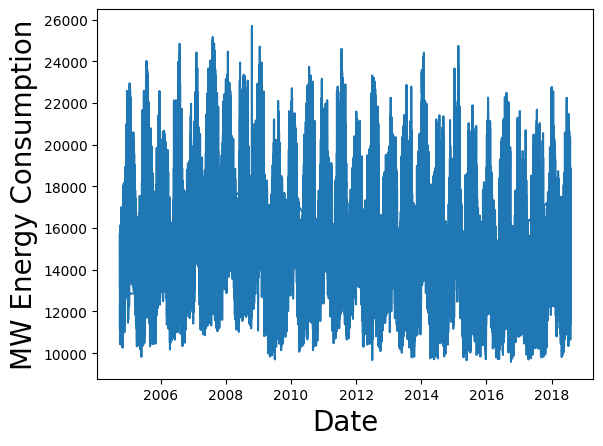

In [2]:
data_fft = pd.read_csv('data/hourly-energy-consumption/AEP_hourly.csv')
y = np.array(data_fft.AEP_MW)
x = data_fft.index
date_array = pd.to_datetime(data_fft.Datetime)
plt.plot(date_array,y)
plt.xlabel('Date',fontsize=20)
plt.ylabel('MW Energy Consumption',fontsize=20)

Text(0, 0.5, 'Temperature')

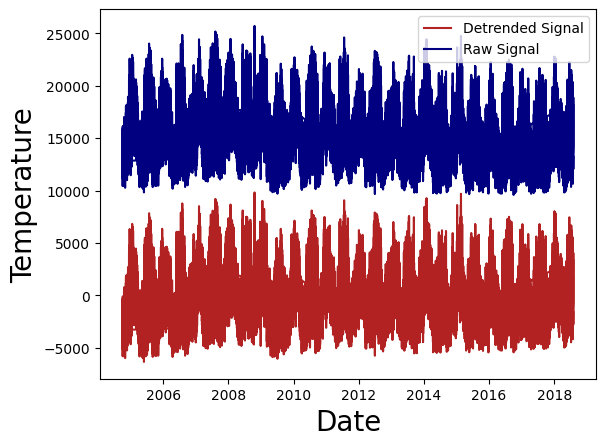

In [3]:
y_detrend = signal.detrend(y)
plt.plot(date_array, y_detrend,color='firebrick',label='Detrended Signal')
plt.plot(date_array,y, color='navy',label='Raw Signal')
plt.legend()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Temperature',fontsize=20)